# HW 10 solution (15pt, Due Nov. 30)

1. Plot the function $f = x^2 - 4 x + 2$ using matplotlib for x between 0 and 4. You can see that there are two roots and one minimum. (5pt)

> (a) Find the analytical expression of the roots using sympy package.

> (b) Find the numerical expression of the root using the scipy package. (5pt)

> (c) Find the minimum point using gradient descend method.

> (d) Find the minimum point using scipy package.

Text(0.5, 0, 'x')

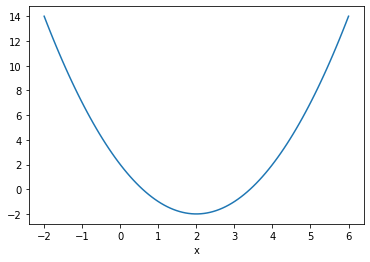

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2,6,100)
plt.plot(x, x**2-4*x+2)
plt.xlabel('x')

In [15]:
import sympy
x = sympy.symbols('x')
sympy.solve(x**2-4*x+2)

[2 - sqrt(2), sqrt(2) + 2]

In [13]:
import scipy.optimize 
scipy.optimize.root(lambda x: x**2-4*x+2, -2) #first root

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.795742e-11])
       r: array([2.82842764])
  status: 1
 success: True
       x: array([0.58578644])

In [14]:
scipy.optimize.root(lambda x: x**2-4*x+2, 4) #second root

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.9314689e-10])
       r: array([-2.82842925])
  status: 1
 success: True
       x: array([3.41421356])

In [12]:
#gradient descend
#the derivative is 2*x-4

x=4 #an initial guess
df = lambda x:2*x-4
while True:
    x = x - 0.1*df(x)
    print(x) #print x at every step
    if abs(df(x))<1e-5:
        break
print('the minimum is at', x) #final x
    

3.6
3.2800000000000002
3.024
2.8192
2.65536
2.524288
2.4194304
2.33554432
2.2684354559999997
2.2147483647999997
2.17179869184
2.137438953472
2.1099511627776
2.08796093022208
2.070368744177664
2.0562949953421312
2.045035996273705
2.0360287970189637
2.028823037615171
2.023058430092137
2.0184467440737093
2.0147573952589672
2.011805916207174
2.009444732965739
2.007555786372591
2.006044629098073
2.0048357032784585
2.003868562622767
2.0030948500982135
2.002475880078571
2.0019807040628566
2.0015845632502853
2.0012676506002283
2.001014120480183
2.0008112963841462
2.000649037107317
2.0005192296858536
2.000415383748683
2.0003323069989465
2.000265845599157
2.0002126764793258
2.0001701411834607
2.0001361129467687
2.000108890357415
2.000087112285932
2.0000696898287456
2.0000557518629964
2.000044601490397
2.0000356811923177
2.000028544953854
2.000022835963083
2.0000182687704666
2.000014615016373
2.0000116920130986
2.000009353610479
2.000007482888383
2.0000059863107067
2.0000047890485653
the minimum 

In [18]:
scipy.optimize.minimize(lambda x: x**2-4*x+2,0)

      fun: -1.9999999999999991
 hess_inv: array([[0.50000001]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.00000003])

2. Plot the function cos(x) and x and on a same plot. Find the point where the two curves cross each other using Newton iteration. (5pt)
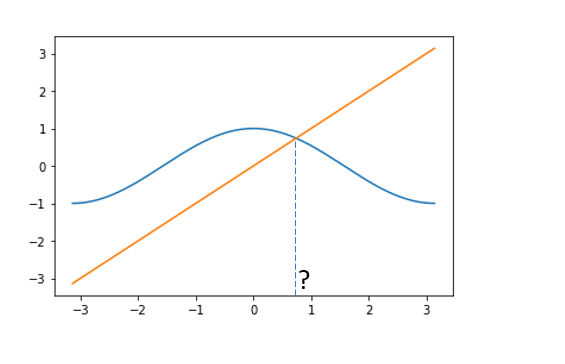

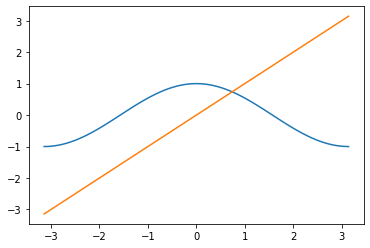

In [19]:
import matplotlib.pyplot as plt
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.cos(x))
plt.plot(x,x)

At the intersection, $cos(x)=x$ or equivalently $\cos(x)-x=0$. Therefore, the goal is trying to find the root of $\cos(x)-x$. To use the Newton's method, we need the derivative as well, which is $-\sin(x)-1$. 

In [23]:
f =lambda x: np.cos(x)-x
df = lambda x: -np.sin(x)-1
x =3  #an initial guss

while True:
    x = x - f(x)/df(x) #newtone method
    print(x)
    if abs(f(x))<1e-5:
        break
print('the result is', x)

-0.4965581782973314
2.131003844480995
0.6896627207783732
0.7396529975313338
0.7390852043758361
the result is 0.7390852043758361


3. (5pt) Modify the code of cellular automaton in the lecture notes to implement rule 30. You can read about it here https://en.wikipedia.org/wiki/Rule_30


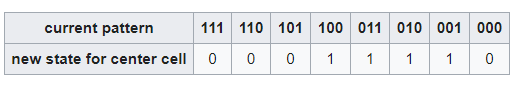

In [25]:
str([0,1])

'[0, 1]'

In [36]:
def rule30(init_array, num_step):
    num_cell = len(init_array)
    m = np.zeros((num_step,num_cell)) # a zero matrix num_step*num_cell
    m[0,:]=init_array # record the inital array
    
    for i in range(1, num_step):
        for i_cell in range(1,num_cell-1): #go through cell_1...cell_n-1
            c =m[i-1,i_cell-1:i_cell+2] #get the three cells.
            c =c.tolist()
            if c==[1,1,1] or c==[1,1,0] or c==[1,0,1] or c==[0,0,0]:
                m[i, i_cell]=0 
            else:
                m[i, i_cell]=1
    return m

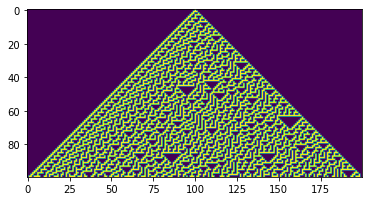

In [41]:
import matplotlib.pyplot as plt
m=np.zeros(200);
m[100]=1;
m = rule30(m,100);
plt.imshow(m)